In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:

pathFigs = '../Figures/'
filePath= '../ExcessData/HMD/'


In [3]:
fileName = 'DK_Deaths_5x1.txt'
dfDKdea = pd.read_csv(filePath+fileName,skiprows=1,delim_whitespace=True)
fileName = 'SE_Deaths_5x1.txt'
dfSEdea = pd.read_csv(filePath+fileName,skiprows=1,delim_whitespace=True)

fileName = 'DK_Population5.txt'
dfDKpop = pd.read_csv(filePath+fileName,skiprows=1,delim_whitespace=True)
fileName = 'SE_Population5.txt'
dfSEpop = pd.read_csv(filePath+fileName,skiprows=1,delim_whitespace=True)
# dfDKdea = pd.read_csv(filePath+fileName,skiprows=1,delim_whitespace=True)

# dfDKdea.groupby(['Year','Age']).sum()
# dfSEpop

In [4]:

dfDKpopTotAll = dfDKpop.groupby('Year').sum()
dfSEpopTotAll = dfSEpop.groupby('Year').sum()

In [22]:
# dfDKpopTotAll.head()
# np.arange(len(dfDKpopTotAll.index)) + 1835

In [21]:
# %matplotlib widget
# fig,ax = plt.subplots()
# ax.plot(dfSEpopTotAll.index,dfSEpopTotAll.Total,'b')
# ax.plot(np.arange(len(dfDKpopTotAll.index))+1835,dfDKpopTotAll.Total,'r')
# # ax.set_ylim(bottom=0)

# ax.set_xlim(left=1900)

In [28]:
# Remove everything before 1990 for convenience

# Remove part of dfDKpop, since there was non-numeric values
dfDKpop = dfDKpop.iloc[-2000:]
dfDKpop['Year'] = pd.to_numeric(dfDKpop.Year)

firstYear = 1990
firstYear = 2000
dfDKdea = dfDKdea[dfDKdea.Year >= firstYear]
dfSEdea = dfSEdea[dfSEdea.Year >= firstYear]
dfDKpop = dfDKpop[dfDKpop.Year >= firstYear]
dfSEpop = dfSEpop[dfSEpop.Year >= firstYear]

In [24]:
dfDKdeaTot = dfDKdea.groupby(['Year']).sum()
dfSEdeaTot = dfSEdea.groupby(['Year']).sum()
dfDKpopTot = dfDKpop.groupby('Year').sum()
dfSEpopTot = dfSEpop.groupby('Year').sum()

(2000.0, 2024.0)

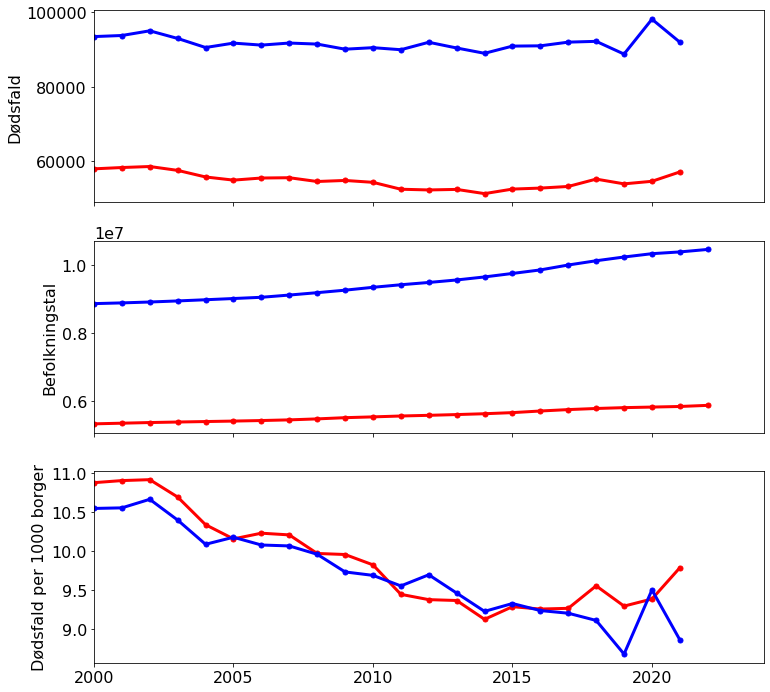

In [27]:
fig,(ax,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(12,12))

ax.plot(dfDKdeaTot.index,dfDKdeaTot.Total,'.-r')
ax.plot(dfSEdeaTot.index,dfSEdeaTot.Total,'.-b')

ax2.plot(dfDKpopTot.index,dfDKpopTot.Total,'.-r')
ax2.plot(dfSEpopTot.index,dfSEpopTot.Total,'.-b')


yearRange = dfDKdeaTot.index
deathsPer1000_DK = 1000*dfDKdeaTot.Total.values/dfDKpopTot.Total.values[:-1]
deathsPer1000_SE = 1000*dfSEdeaTot.Total.values/dfSEpopTot.Total.values[:-1]

ax3.plot(yearRange,deathsPer1000_DK,'.-r')
ax3.plot(yearRange,deathsPer1000_SE,'.-b')

ax.set_ylabel('Dødsfald')
ax2.set_ylabel('Befolkningstal')
ax3.set_ylabel('Dødsfald per 1000 borger')


ax.set_xlim(left=dfDKdeaTot.index.values[0],right=2024)

In [8]:
periodToFit = np.arange(2014,2019+1)
# periodToFit = np.arange(2013,2019)

deathsToFit_DK = dfDKdeaTot[dfDKdeaTot.index.isin(periodToFit)].Total.values
deathsToFit_SE = dfSEdeaTot[dfSEdeaTot.index.isin(periodToFit)].Total.values
popToFit_DK = dfDKpopTot[dfDKpopTot.index.isin(periodToFit)].Total.values
popToFit_SE = dfSEpopTot[dfSEpopTot.index.isin(periodToFit)].Total.values


dataToFit_DK = deathsToFit_DK/popToFit_DK
dataToFit_SE = deathsToFit_SE/popToFit_SE 


# deathsPer1000_DK = 1000*dfDKdeaTot.Total.values/dfDKpopTot.Total.values[:-1]
# deathsPer1000_SE = 1000*dfSEdeaTot.Total.values/dfSEpopTot.Total.values[:-1]
# dataToFit_DK = deathsPer1000_DK
# # dataToFit_SE

In [9]:

from scipy import stats

In [10]:
res_DK = stats.linregress(periodToFit,dataToFit_DK)
res_SE = stats.linregress(periodToFit,dataToFit_SE)


tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(periodToFit)-2)

print(f"DK, slope (95%):  {res_DK.slope:.6f} +/- {ts*res_DK.stderr:.6f}")
print(f"SE, slope (95%): {res_SE.slope:.6f} +/- {ts*res_SE.stderr:.6f}")

DK, slope (95%):  0.000047 +/- 0.000081
SE, slope (95%): -0.000098 +/- 0.000106


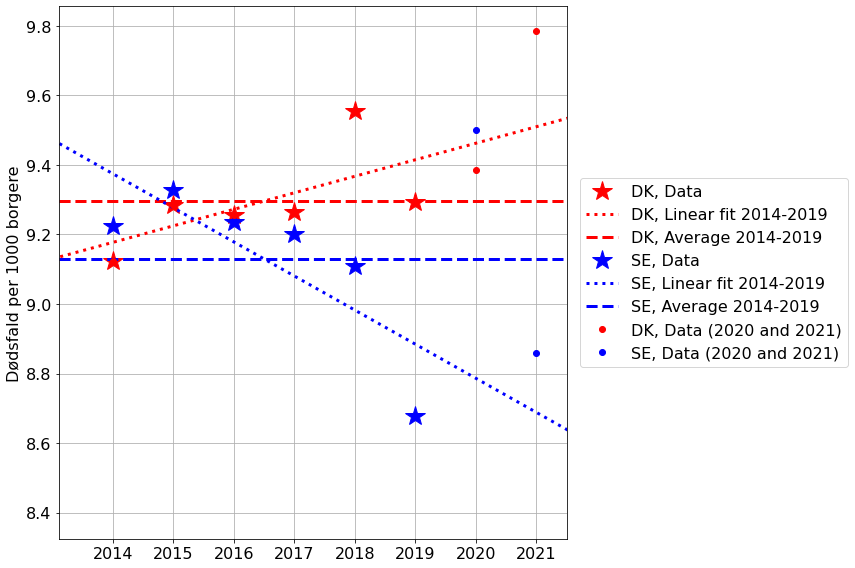

In [11]:
fig,ax = plt.subplots()

finYearRange = np.linspace(periodToFit[0]-1,periodToFit[-1]+5,100)

ax.plot(periodToFit,1000*dataToFit_DK,'*r',label='DK, Data',markersize=20)
ax.plot(finYearRange,1000*(res_DK.slope*finYearRange + res_DK.intercept),':r',label='DK, Linear fit 2014-2019')
ax.axhline(1000*np.average(dataToFit_DK),color='r',ls='--',label='DK, Average 2014-2019')

ax.plot(periodToFit,1000*dataToFit_SE,'*b',label='SE, Data',markersize=20)
ax.plot(finYearRange,1000*(res_SE.slope*finYearRange + res_SE.intercept),':b',label='SE, Linear fit 2014-2019')
ax.axhline(1000*np.average(dataToFit_SE),color='b',ls='--',label='SE, Average 2014-2019')


yearRange = dfDKdeaTot.index
deathsPerPop_DK = dfDKdeaTot.Total.values/dfDKpopTot.Total.values[:-1]
deathsPerPop_SE = dfSEdeaTot.Total.values/dfSEpopTot.Total.values[:-1]

ax.plot(yearRange[-8:],1000*deathsPerPop_DK[-8:],'.r',label='DK, Data (2020 and 2021)',markersize=12)
ax.plot(yearRange[-8:],1000*deathsPerPop_SE[-8:],'.b',label='SE, Data (2020 and 2021)',markersize=12)

ax.set_xlim(left=2013.1,right=2021.5)
ax.grid()

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))

ax.set_ylabel('Dødsfald per 1000 borgere')

fig.tight_layout()
if saveFigures:
    fig.savefig(pathFigs+'AllCauseTrend_DKvsSE')

In [12]:
# (ts*res_DK.stderr+res_DK.slope) 
# res_DK.slope + res_DK.stderr
res_DK
(res_DK.slope+res_DK.stderr)
(res_DK.slope-res_DK.stderr)
# res_DK.slope

1.8349647422051344e-05

In [13]:
# fig,ax = plt.subplots()

# ax.plot(finYearRange,1000*(res_DK.slope*finYearRange + res_DK.intercept),':r',label='DK, Linear fit 2014-2019')
# ax.plot(finYearRange,1000*((res_DK.slope+np.sqrt(res_DK.stderr))*finYearRange + res_DK.intercept),':r',label='DK, Linear fit 2014-2019')
# ax.plot(finYearRange,1000*((res_DK.slope-np.sqrt(res_DK.stderr))*finYearRange + res_DK.intercept),':r',label='DK, Linear fit 2014-2019')

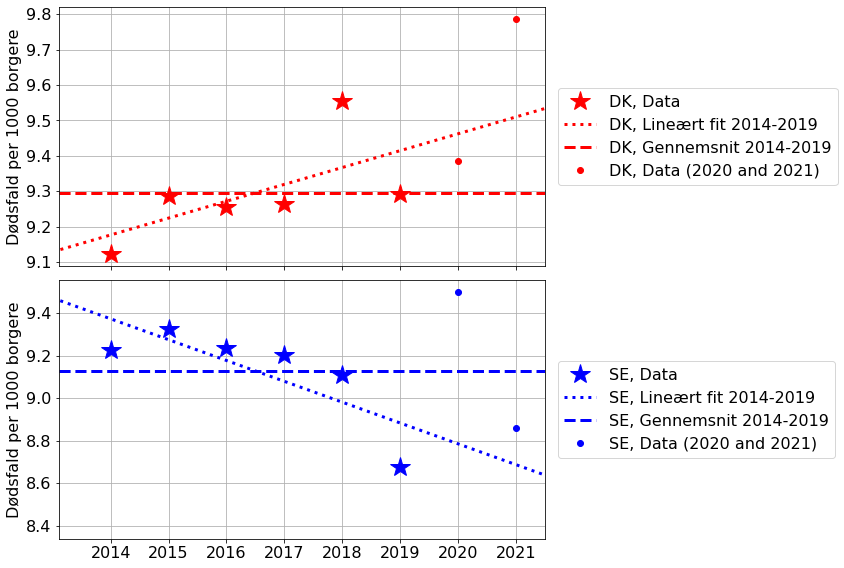

In [14]:
fig,(ax,ax2) = plt.subplots(2,1,sharex=True)

finYearRange = np.linspace(periodToFit[0]-1,periodToFit[-1]+5,100)

ax.plot(periodToFit,1000*dataToFit_DK,'*r',label='DK, Data',markersize=20)
ax.plot(finYearRange,1000*(res_DK.slope*finYearRange + res_DK.intercept),':r',label='DK, Lineært fit 2014-2019')
# ax.plot(finYearRange,1000*((res_DK.slope+np.sqrt(res_DK.stderr))*finYearRange + res_DK.intercept),':r',label='DK, Lineært fit 2014-2019')

ax.axhline(1000*np.average(dataToFit_DK),color='r',ls='--',label='DK, Gennemsnit 2014-2019')

ax2.plot(periodToFit,1000*dataToFit_SE,'*b',label='SE, Data',markersize=20)
ax2.plot(finYearRange,1000*(res_SE.slope*finYearRange + res_SE.intercept),':b',label='SE, Lineært fit 2014-2019')
ax2.axhline(1000*np.average(dataToFit_SE),color='b',ls='--',label='SE, Gennemsnit 2014-2019')


yearRange = dfDKdeaTot.index
deathsPerPop_DK = dfDKdeaTot.Total.values/dfDKpopTot.Total.values[:-1]
deathsPerPop_SE = dfSEdeaTot.Total.values/dfSEpopTot.Total.values[:-1]

ax.plot(yearRange[-8:],1000*deathsPerPop_DK[-8:],'.r',label='DK, Data (2020 and 2021)',markersize=12)
ax2.plot(yearRange[-8:],1000*deathsPerPop_SE[-8:],'.b',label='SE, Data (2020 and 2021)',markersize=12)

ax.set_xlim(left=2013.1,right=2021.5)
ax.grid()
ax2.grid()

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
ax2.legend(loc='center left',bbox_to_anchor=(1.01,0.5))

ax.set_ylabel('Dødsfald per 1000 borgere')
ax2.set_ylabel('Dødsfald per 1000 borgere')

fig.tight_layout()
# if saveFigures:
#     fig.savefig(pathFigs+'AllCauseTrend_DKvsSE')

In [15]:
# 1000*(res_DK.slope*periodToFit + res_DK.intercept)

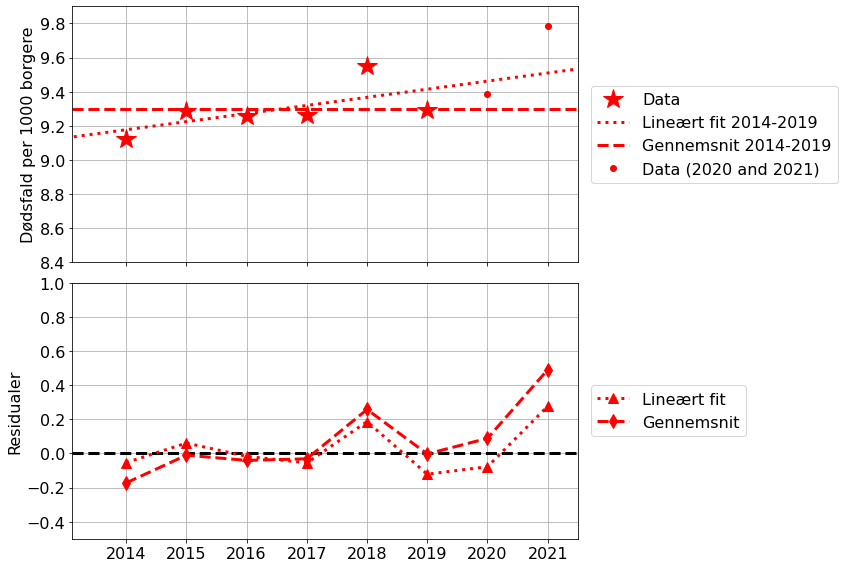

In [16]:
fig,(ax,ax2) = plt.subplots(2,1,sharex=True)

finYearRange = np.linspace(periodToFit[0]-1,periodToFit[-1]+5,100)

ax.plot(periodToFit,1000*dataToFit_DK,'*r',label='Data',markersize=20)
ax.plot(finYearRange,1000*(res_DK.slope*finYearRange + res_DK.intercept),':r',label='Lineært fit 2014-2019')
# ax.plot(finYearRange,1000*((res_DK.slope+np.sqrt(res_DK.stderr))*finYearRange + res_DK.intercept),':r',label='Lineært fit 2014-2019')

ax.axhline(1000*np.average(dataToFit_DK),color='r',ls='--',label='Gennemsnit 2014-2019')

ax2.axhline(0,color='k',ls='--')


# ax2.plot(periodToFit,1000*(res_DK.slope*periodToFit + res_DK.intercept)-1000*dataToFit_DK,'*r')
ax2.plot(yearRange[-8:],1000*deathsPerPop_DK[-8:]-1000*(res_DK.slope*yearRange[-8:] + res_DK.intercept),'^:r',label='Lineært fit')
ax2.plot(yearRange[-8:],1000*deathsPerPop_DK[-8:]-1000*np.average(dataToFit_DK),'d--r',label='Gennemsnit')

# ax2.plot(periodToFit,1000*dataToFit_SE,'*b',label='SE, Data',markersize=20)
# ax2.plot(finYearRange,1000*(res_SE.slope*finYearRange + res_SE.intercept),':b',label='SE, Lineært fit 2014-2019')
# ax2.axhline(1000*np.average(dataToFit_SE),color='b',ls='--',label='SE, Gennemsnit 2014-2019')


yearRange = dfDKdeaTot.index
deathsPerPop_DK = dfDKdeaTot.Total.values/dfDKpopTot.Total.values[:-1]
deathsPerPop_SE = dfSEdeaTot.Total.values/dfSEpopTot.Total.values[:-1]

ax.plot(yearRange[-8:],1000*deathsPerPop_DK[-8:],'.r',label='Data (2020 and 2021)',markersize=12)
# ax2.plot(yearRange[-8:],1000*deathsPerPop_SE[-8:],'.b',label='SE, Data (2020 and 2021)',markersize=12)

ax.set_xlim(left=2013.1,right=2021.5)
ax.grid()
ax2.grid()

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
ax2.legend(loc='center left',bbox_to_anchor=(1.01,0.5))

ax.set_ylabel('Dødsfald per 1000 borgere')
ax2.set_ylabel('Residualer')

ax.set_ylim([8.4,9.9])
ax2.set_ylim([-0.5,1])

fig.tight_layout()
if saveFigures:
    fig.savefig(pathFigs+'AllCauseTrend_Residuals_DK')

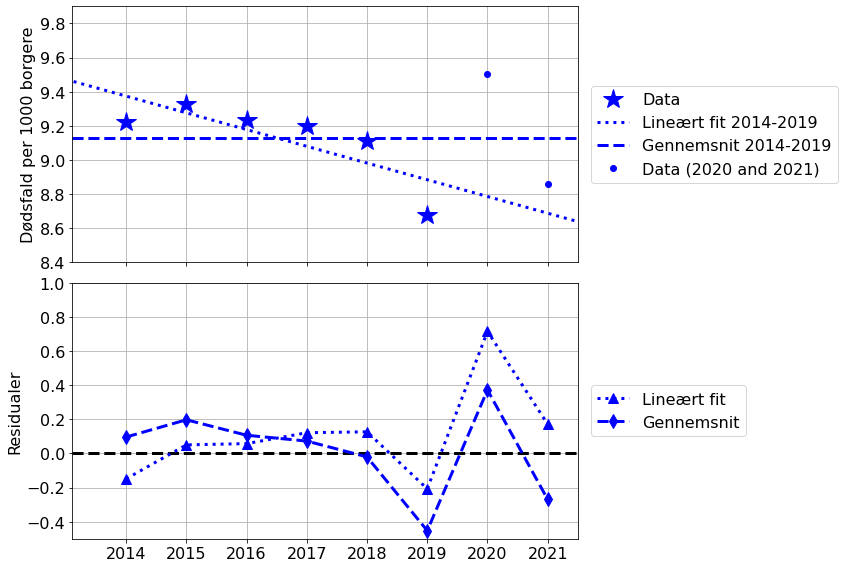

In [17]:
fig,(ax,ax2) = plt.subplots(2,1,sharex=True)

finYearRange = np.linspace(periodToFit[0]-1,periodToFit[-1]+5,100)

ax.plot(periodToFit,1000*dataToFit_SE,'*b',label='Data',markersize=20)
ax.plot(finYearRange,1000*(res_SE.slope*finYearRange + res_SE.intercept),':b',label='Lineært fit 2014-2019')
# ax.plot(finYearRange,1000*((res_SE.slope+np.sqrt(res_SE.stderr))*finYearRange + res_SE.intercept),':b',label='Lineært fit 2014-2019')

ax.axhline(1000*np.average(dataToFit_SE),color='b',ls='--',label='Gennemsnit 2014-2019')

ax2.axhline(0,color='k',ls='--')


ax2.plot(yearRange[-8:],1000*deathsPerPop_SE[-8:]-1000*(res_SE.slope*yearRange[-8:] + res_SE.intercept),'^:b',label='Lineært fit')
ax2.plot(yearRange[-8:],1000*deathsPerPop_SE[-8:]-1000*np.average(dataToFit_SE),'d--b',label='Gennemsnit')


yearRange = dfDKdeaTot.index
deathsPerPop_SE = dfDKdeaTot.Total.values/dfDKpopTot.Total.values[:-1]
deathsPerPop_SE = dfSEdeaTot.Total.values/dfSEpopTot.Total.values[:-1]

ax.plot(yearRange[-8:],1000*deathsPerPop_SE[-8:],'.b',label='Data (2020 and 2021)',markersize=12)

ax.set_xlim(left=2013.1,right=2021.5)
ax.grid()
ax2.grid()

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
ax2.legend(loc='center left',bbox_to_anchor=(1.01,0.5))

ax.set_ylabel('Dødsfald per 1000 borgere')
ax2.set_ylabel('Residualer')

ax.set_ylim([8.4,9.9])
ax2.set_ylim([-0.5,1])
fig.tight_layout()
if saveFigures:
    fig.savefig(pathFigs+'AllCauseTrend_Residuals_SE')

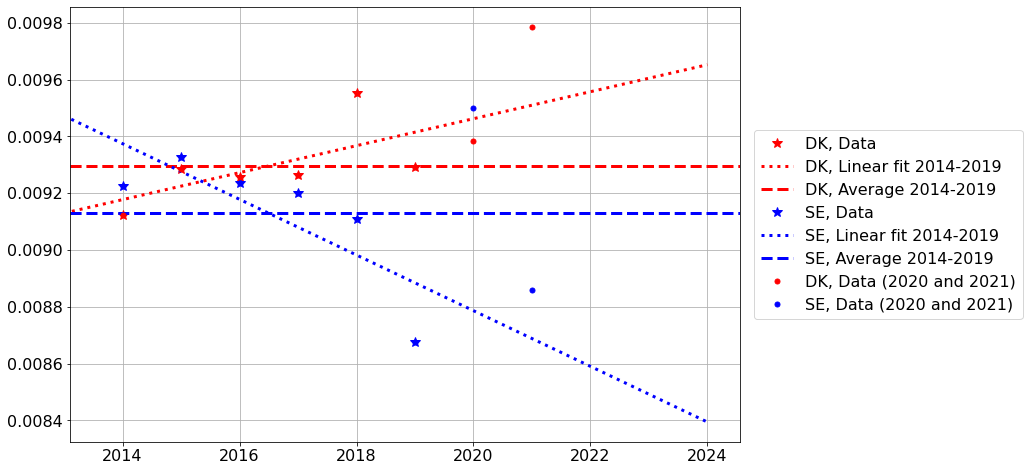

In [18]:
fig,ax = plt.subplots()

finYearRange = np.linspace(periodToFit[0]-1,periodToFit[-1]+5,100)

ax.plot(periodToFit,dataToFit_DK,'*r',label='DK, Data')
ax.plot(finYearRange,res_DK.slope*finYearRange + res_DK.intercept,':r',label='DK, Linear fit 2014-2019')
ax.axhline(np.average(dataToFit_DK),color='r',ls='--',label='DK, Average 2014-2019')

ax.plot(periodToFit,dataToFit_SE,'*b',label='SE, Data')
ax.plot(finYearRange,res_SE.slope*finYearRange + res_SE.intercept,':b',label='SE, Linear fit 2014-2019')
ax.axhline(np.average(dataToFit_SE),color='b',ls='--',label='SE, Average 2014-2019')


yearRange = dfDKdeaTot.index
deathsPerPop_DK = dfDKdeaTot.Total.values/dfDKpopTot.Total.values[:-1]
deathsPerPop_SE = dfSEdeaTot.Total.values/dfSEpopTot.Total.values[:-1]

ax.plot(yearRange[-8:],deathsPerPop_DK[-8:],'.r',label='DK, Data (2020 and 2021)')
ax.plot(yearRange[-8:],deathsPerPop_SE[-8:],'.b',label='SE, Data (2020 and 2021)')

ax.set_xlim(left=2013.1)
ax.grid()

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))